In [12]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
images = np.load("/content/images.npy", mmap_mode='r')


In [19]:
label = pd.read_csv('/content/Labels.csv')
label.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [20]:
images.shape

(4750, 128, 128, 3)

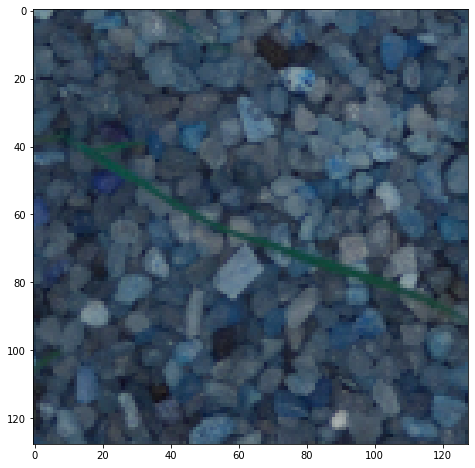

In [21]:
#Visualizing image from the dataset
plt.figure(figsize = (8,8))
simg = images[4748]
plt.imshow(simg)

In [22]:
new_x = np.empty((4750, 128, 128, 3))

In [23]:
len(new_x)

4750

In [24]:
new_x.shape

(4750, 128, 128, 3)

In [25]:
for idx, line in enumerate(images):
  new_x[idx] = images[idx]

In [26]:
new1_x = np.empty((4750, 128, 128, 3))

In [27]:
#Applying blur to the data
import cv2
for idx, img in enumerate(new_x):
  new1_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [28]:
#Normalizing the data
new1_x = new1_x.astype('float32') / 255.0

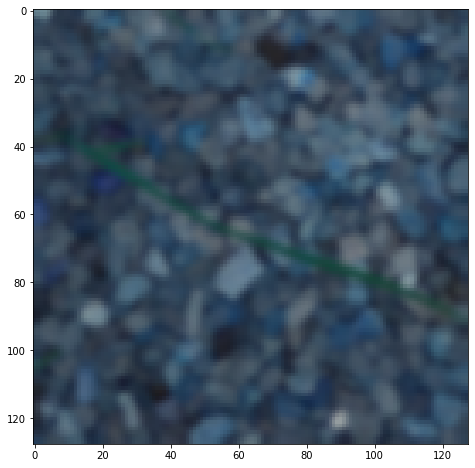

In [29]:
#Visualizing blurred image
plt.figure(figsize = (8,8))
simg1 = new1_x[4748]
plt.imshow(simg1)

In [30]:
label.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [31]:
#Converting labels to one hot vectors
y_train_df = pd.get_dummies(label)
y_train_df.head()

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
y = y_train_df.to_numpy()

In [33]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
y.shape

(4750, 12)

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(new1_x, y, test_size = 0.3, stratify=y)

In [38]:
x_train.shape

(3325, 128, 128, 3)

In [39]:
y_train.shape

(3325, 12)

In [42]:
x_test.shape

(1425, 128, 128, 3)

In [43]:
y_test.shape

(1425, 12)

In [41]:
# Printing y_train[0]
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [44]:
#Splitting the test data into test and validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5)

In [45]:
x_val.shape

(713, 128, 128, 3)

In [46]:
x_test.shape

(712, 128, 128, 3)

In [ ]:
#Shapes are correct for model building

In [47]:
# Buliding the model
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.layers import Flatten

model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), activation="relu", input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu"))


model.add(Flatten())

model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [48]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001)

In [49]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [50]:
# Setting the batch size and epoch
batch_size = 300
epochs = 100

Epoch 1/100
12/12 [==============================] - 52s 992ms/step - loss: 2.5162 - accuracy: 0.1035 - val_loss: 2.4773 - val_accuracy: 0.1360
Epoch 2/100
12/12 [==============================] - 9s 730ms/step - loss: 2.4508 - accuracy: 0.1167 - val_loss: 2.4716 - val_accuracy: 0.1360
Epoch 3/100
12/12 [==============================] - 9s 730ms/step - loss: 2.4068 - accuracy: 0.1224 - val_loss: 2.4584 - val_accuracy: 0.1360
Epoch 4/100
12/12 [==============================] - 9s 730ms/step - loss: 2.3263 - accuracy: 0.1659 - val_loss: 2.4574 - val_accuracy: 0.2412
Epoch 5/100
12/12 [==============================] - 9s 723ms/step - loss: 2.2514 - accuracy: 0.2513 - val_loss: 2.4429 - val_accuracy: 0.1753
Epoch 6/100
12/12 [==============================] - 9s 727ms/step - loss: 2.1367 - accuracy: 0.2699 - val_loss: 2.4297 - val_accuracy: 0.1543
Epoch 7/100
12/12 [==============================] - 9s 726ms/step - loss: 2.0285 - accuracy: 0.2747 - val_loss: 2.3806 - val_accuracy: 0.210

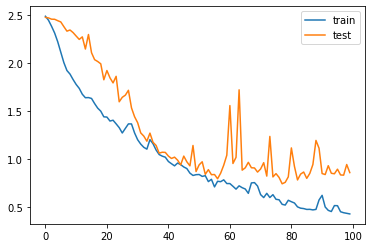

In [51]:
# Model Fitting
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1,
                    
                    )

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


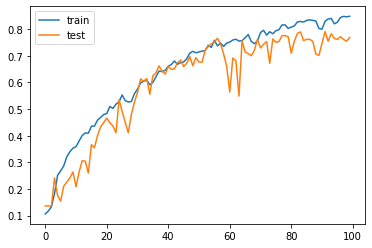

In [52]:
# Accuracy Graph
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [53]:
# Model performance on test data
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 2s 44ms/step - loss: 0.8039 - accuracy: 0.7865
Test loss: 0.8039235472679138
Test accuracy: 0.7865168452262878


In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([[3.0944560e-21, 2.1736126e-09, 2.3495606e-15, ..., 2.3335367e-07,
        9.9999940e-01, 3.5304861e-08],
       [4.2681347e-09, 7.3315921e-16, 9.0157573e-07, ..., 3.5148116e-09,
        3.3695991e-12, 1.1087473e-05],
       [5.1810189e-20, 5.1911613e-15, 4.1679290e-12, ..., 2.4737465e-10,
        4.7302592e-11, 1.0000000e+00],
       ...,
       [2.3593110e-01, 4.5730896e-16, 3.7880457e-15, ..., 1.8606379e-17,
        4.7280765e-15, 2.0294829e-15],
       [1.0911176e-03, 6.9269040e-03, 1.1518402e-02, ..., 3.7054032e-02,
        1.3004870e-02, 7.6657897e-01],
       [2.4899761e-11, 5.4590564e-05, 2.0857675e-05, ..., 3.0287483e-03,
        7.1840103e-09, 1.1652175e-04]], dtype=float32)

In [56]:
y_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [57]:
Y_pred = np.argmax(y_pred, axis=1)

In [58]:
Y_pred

array([10,  5, 11,  8, 10,  6, 10, 10, 11, 10,  8,  1,  4, 10,  8,  2,  6,
        8,  5,  6, 10, 10,  5,  1,  6,  2,  3, 10,  2, 10,  3,  8,  3,  3,
        8, 10, 11,  6,  1, 11,  5, 11,  6,  8,  3,  3,  8,  5,  3, 11,  1,
        3,  6,  5, 10,  6,  8, 10,  8,  6,  3,  9, 10,  6, 10,  6,  8, 10,
        5, 10,  5,  8, 10,  3,  8,  2,  6,  8,  4,  8, 10,  2,  5,  8, 10,
        3,  3, 10,  2,  9, 11,  6,  6, 10, 10,  6,  3,  1,  1,  8,  1,  5,
       11,  2,  1,  7,  5, 11,  6,  8, 11, 10,  3,  1,  3,  6,  6,  1, 11,
       10,  4, 10, 10,  5, 10, 11, 11,  6,  5,  6,  8,  7,  2,  8,  6,  1,
       11,  6,  6,  6, 11,  3, 10,  6,  3,  5,  6, 11,  1, 11,  4,  5,  7,
        3,  8,  3,  4,  3,  1,  2, 11, 10,  3,  8,  2,  4,  6,  6, 10,  6,
        1,  2,  2,  7,  4,  6,  8,  6,  6,  1,  5,  9, 10, 10,  6,  6,  5,
        6,  6,  7,  8,  5, 10,  7,  6,  6,  3,  3,  4, 11,  1,  8, 10,  3,
        3, 10,  1, 10,  6,  2,  1,  5, 10,  3,  2,  6,  6,  9, 10,  2,  5,
        1, 10,  8,  3, 10

In [59]:
Y_pred.shape

(712,)

In [60]:
Y_test = np.argmax(y_test, axis=1)
Y_test

array([10,  5, 11,  8, 10,  0, 10, 10, 11,  7,  7,  1,  4, 10,  8,  2,  0,
        8,  8,  6, 10,  3,  5,  9,  6,  5,  3, 10,  2, 10,  3,  8,  3,  3,
        8, 10, 11,  6,  1,  4,  5,  5,  6,  8,  3,  3,  8,  5,  3, 11,  1,
        3,  6,  5, 10,  6,  8, 10,  9,  6,  3,  9, 10,  6, 10,  6,  8, 10,
        5, 10,  6,  8, 10,  3, 11,  2,  6,  8,  0,  8, 10,  7,  5,  9, 10,
        3,  3, 10,  2,  9, 11,  6,  6,  3,  3,  0,  3,  1,  1,  8,  1,  6,
       11,  2,  1,  7,  0, 11, 10,  8, 11, 10,  3,  1,  8,  6,  6,  1, 11,
       10,  6,  5, 10,  5, 10, 11, 11,  0,  5,  6,  8,  7,  8,  8,  6,  1,
       11,  6,  0,  6, 10,  3, 11,  6,  3,  5,  0,  7,  7, 11,  4,  5,  7,
        3,  8,  3,  4,  3,  1, 10, 11, 10,  3,  8,  2,  4,  6,  6, 10,  0,
        1,  2,  5,  7,  4,  6,  7,  0,  6,  1,  5, 11, 10, 10,  6,  6,  5,
        6,  0,  7,  8,  5, 10,  7,  6,  6,  9,  3,  4, 11,  1,  8, 10,  3,
        3,  9,  1, 10,  6,  2,  1,  5, 10,  3,  2,  6,  6,  9, 10,  2,  5,
        1, 10,  8,  3, 10

In [61]:
# Confussion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

=== Confusion Matrix ===
[[ 0  0  0  0  5  4 26  0  3  0  0  0]
 [ 0 47  8  0  0  0  0  0  1  0  0  0]
 [ 0  2 31  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 81  0  0  0  0  1  0  4  0]
 [ 0  0  0  0 18  0  0  0  1  0  0  1]
 [ 0  1  6  1  1 69  0  0  1  1  2  3]
 [ 0  0  0  1  7  3 88  0  2  0  1  0]
 [ 0  4  3  1  3  2  0 21  8  0  1  1]
 [ 0  0  3  3  1  1  1  1 60  0  0  3]
 [ 0  1  1  1  0  2  0  0  7 20  3  0]
 [ 0  1  1  0  1  0  1  0  1  0 80  1]
 [ 0  0  0  1  0  0  0  0  3  2  2 45]]


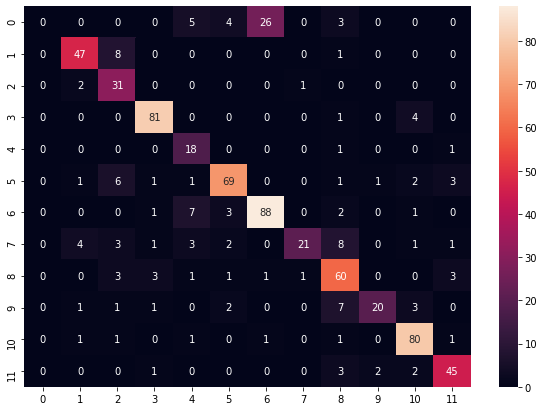

In [62]:
# Confussion Matrix
df_cm = pd.DataFrame(cm, 
                     columns = [i for i in range(0,12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

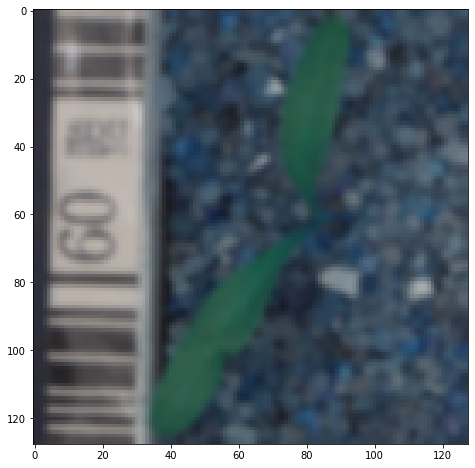

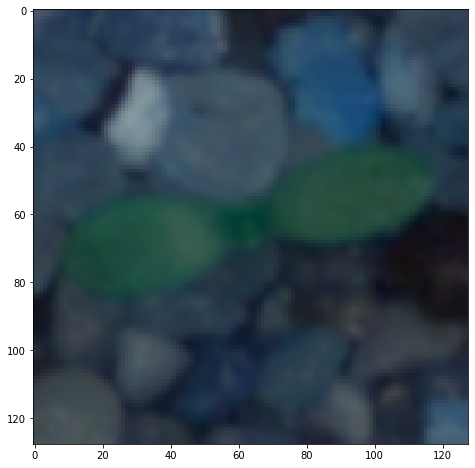

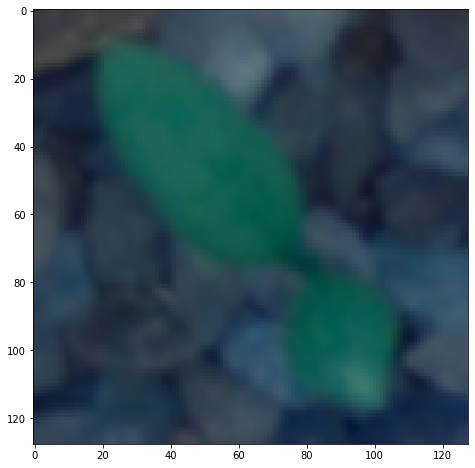

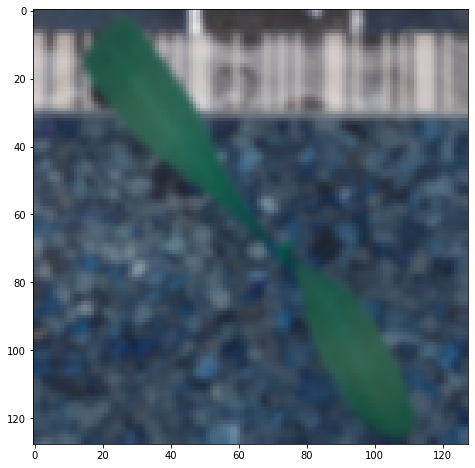

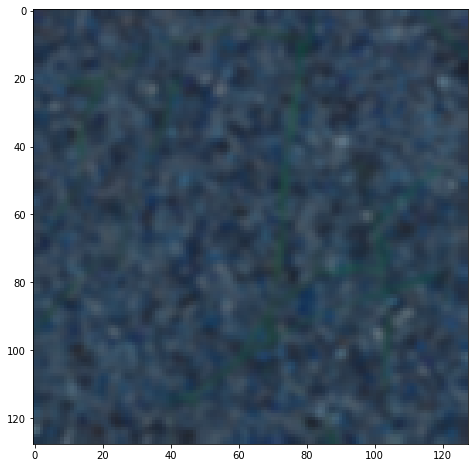

In [66]:
#Visualizing image from test set
for item in [x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]]:  
  plt.figure(figsize = (8,8))
  tstimage = item
  plt.imshow(tstimage)

y_test[2] is labeled as 11 and the predicted is also 11
y_test[3] is labeled as 08 and the predicted is also 08
y_test[33] is labeled as 03 and the predicted is also 03
y_test[36] is labeled as 11 and the predicted is also 11
y_test[59] is labeled as 06 and the predicted is also 06